In [1]:
from sentence_transformers import SentenceTransformer, util
model = SentenceTransformer('/workspace/CS762_Project/e5-large-v2')
# Two lists of sentences
sentences1 = ['The cat sits outside',
             'A man is playing guitar',
             'The new movie is awesome'][:2]

sentences2 = ['The dog plays in the garden',
              'A woman watches TV',
              'The new movie is so great'][:2]

#Compute embedding for both lists
embeddings1 = model.encode(sentences1, convert_to_tensor=True)
embeddings2 = model.encode(sentences2, convert_to_tensor=True)

#Compute cosine-similarities
cosine_scores = util.cos_sim(embeddings1, embeddings2)
print(cosine_scores)
#Output the pairs with their score
# for i in range(len(sentences1)):
#     print("{} \t\t {} \t\t Score: {:.4f}".format(sentences1[i], sentences2[i], cosine_scores[i][i]))


tensor([[0.7624, 0.7429],
        [0.7392, 0.7207]], device='cuda:0')


In [2]:
embeddings1

tensor([[ 0.0185, -0.0481,  0.0244,  ..., -0.0255,  0.0340,  0.0210],
        [ 0.0400, -0.0712,  0.0183,  ..., -0.0183,  0.0360,  0.0475]],
       device='cuda:0')

In [22]:
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import json

def plot_tsne(embeddings, labels):
    """
    Generate and plot a t-SNE visualization of word embeddings.
    """
    tsne = TSNE(n_components=2, random_state=42)
    embeddings_2d = tsne.fit_transform(embeddings)

    plt.figure(figsize=(10, 8))
    for i, label in enumerate(labels):
        plt.scatter(embeddings_2d[i, 0], embeddings_2d[i, 1], marker='o', color='b', s=2)
        plt.text(embeddings_2d[i, 0], embeddings_2d[i, 1], label, fontsize=8)

    plt.title('t-SNE Visualization of Word Embeddings')
    plt.xlabel('t-SNE Dimension 1')
    plt.ylabel('t-SNE Dimension 2')
    plt.show()

with open('/workspace/CS762_Project/Notebooks/combined_v2_Dec8_after_exec_check.json', 'r') as json_file:
    data = json.load(json_file)

questions = [i['question'] for i in data]
embeddings = model.encode(questions)
labels = ['' for i in data]




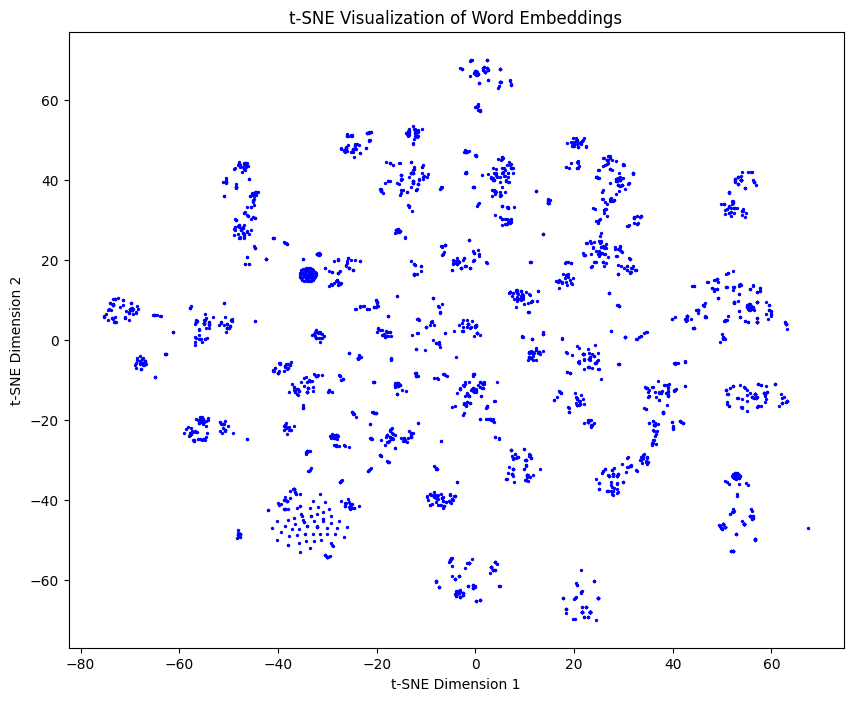

In [23]:
plot_tsne(embeddings, labels)

In [24]:
questions = [i['question'] for i in data]
embeddings = model.encode(questions)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Sum of Squared Errors (SSE): 522.0662231445312


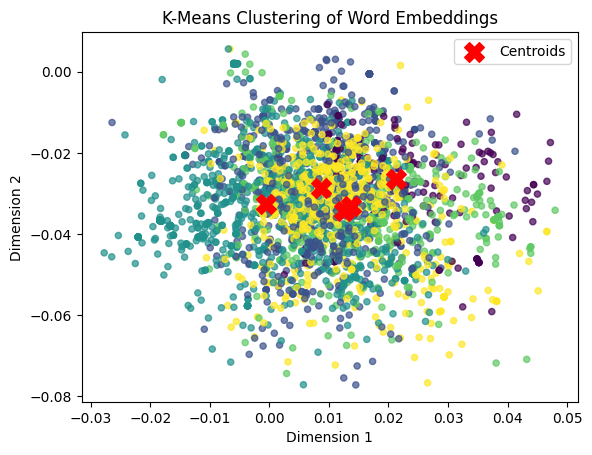

In [71]:
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

num_clusters = 5

# Perform k-means clustering
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(embeddings)
cluster_centers = kmeans.cluster_centers_

# Calculate the Sum of Squared Errors (SSE)
sse = np.sum((embeddings - cluster_centers[cluster_labels]) ** 2)

# Print the SSE
print(f"Sum of Squared Errors (SSE): {sse}")

# Plotting (for illustration, adjust as needed for 1024-dimensional embeddings)
plt.scatter(embeddings[:, 0], embeddings[:, 1], c=cluster_labels, cmap='viridis', s=20, alpha=0.7)
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='red', marker='X', s=200, label='Centroids')
plt.title('K-Means Clustering of Word Embeddings')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.legend()
plt.show()


In [72]:
with open('/workspace/CS762_Project/Notebooks/combined_v1_Dec5_after_exec_check.json', 'r') as json_file:
    data = json.load(json_file)

In [73]:
len(cluster_labels)

3214

In [74]:
len(data)

1093

In [75]:
cluster_cats = {}
for idx in range(len(data)):
    cat = data[idx]['category']
    if cat not in cluster_cats:
        cluster_cats[cat] = []
    cluster_cats[cat].append(cluster_labels[idx])

In [76]:
cluster_cats

{'Hash': [4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  2,
  2,
  4,
  4,
  4,
  2,
  2,
  4,
  4,
  4,
  2,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  2,
  4,
  4,
  4,
  3,
  4,
  4,
  4,
  4,
  4,
  4,
  2,
  4,
  4,
  2,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  2,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  2,
  4,
  4,
  4,
  4,
  4,
  2,
  4,
  4,
  4,
  4,
  4,
  1,
  2,
  4,
  4,
  3,
  2,
  4,
  4,
  4,
  4,
  2,
  4,
  4,
  4,
  2,
  4,
  2,
  4,
  4,
  4,
  2,
  2,
  4,
  4,
  2,
  2,
  4,
  4],
 'Matrix': [4, 4, 2, 4, 4, 4, 4, 4],
 'Bitwise': [4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  2,
  4,
  1,
  4,
  2,
  1,
  4,
  4,
  1,
  2,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  2,
  4,
  4,
  4,
  4,
  4,
  4,
  1,
  4,
  2,
  4,
  4,
  4,
  4,
  4,
  4,
  3,
  2,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  2,
  2,
  4,
  4,
  1,
  1,
  1,
  1,
  1

In [77]:
cluster_cats_stats = {}
for i in cluster_cats:
    cluster_count = {}
    for j in cluster_cats[i]:
        if j not in cluster_count:
            cluster_count[j]=0
        cluster_count[j]+=1
    cluster_cats_stats[i] = cluster_count
cluster_cats_stats 

{'Hash': {4: 98, 2: 20, 3: 2, 1: 1},
 'Matrix': {4: 7, 2: 1},
 'Bitwise': {4: 50, 2: 8, 1: 32, 3: 1},
 'Searching': {1: 16, 2: 2},
 'Heap': {1: 37, 2: 1},
 'Stack': {1: 29},
 'Dynamic_programming': {1: 165, 2: 30},
 'Math': {2: 68, 1: 58},
 'Pattern': {2: 95, 1: 52},
 'String': {1: 24, 2: 49, 4: 30, 0: 29, 3: 26},
 'Array': {4: 50, 0: 44, 2: 22, 3: 39, 1: 7}}

In [78]:
count_dict = {}
for i in cluster_cats_stats:
    for j in cluster_cats_stats[i]:
        if j not in count_dict:
            count_dict[j]=0
        count_dict[j]+=cluster_cats_stats[i][j]
count_dict

{4: 235, 2: 296, 3: 68, 1: 421, 0: 73}

In [79]:
import numpy as np

def calculate_spread(embeddings):
    """
    Calculate the spread (standard deviation) of word embeddings.
    """
    # Assuming embeddings is a numpy array where each row represents the embedding of a word
    std_deviation = np.std(embeddings, axis=0)
    return std_deviation


spread = calculate_spread(embeddings)

# Print the standard deviation values for each dimension
print("Spread (Standard Deviation) along each dimension:")
print(spread)


Spread (Standard Deviation) along each dimension:
[0.01276308 0.01352815 0.01502019 ... 0.0130703  0.01320923 0.01466491]


In [80]:
sum(spread)/len(spread)

0.01376250812154467

In [82]:
len(spread)

1024

In [87]:
with open('/workspace/CS762_Project/Notebooks/combined_v2_Dec8_after_exec_check.json', 'r') as json_file:
    data2 = json.load(json_file)
with open('/workspace/CS762_Project/Notebooks/combined_v1_Dec5_after_exec_check.json', 'r') as json_file:
    data1 = json.load(json_file)
with open('/workspace/CS762_Project/Data_files/final_seed_data.json', 'r') as json_file:
    seed_data = json.load(json_file)

In [99]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

def calculate_spread_cosine(embeddings):
    """
    Calculate the spread using cosine similarity between embeddings.
    """
    # Assuming embeddings is a numpy array where each row represents the embedding of a word
    similarity_matrix = cosine_similarity(embeddings)
    
    # Exclude self-similarity (diagonal) and take the average of the remaining similarities
    spread_cosine = np.mean(similarity_matrix[np.triu_indices(similarity_matrix.shape[0], k=1)])
    
    return spread_cosine


In [97]:
len(data2)

3214

In [88]:
questions = [i['question'] for i in data1]
embeddings = model.encode(questions)
spread1 = calculate_spread(embeddings)
questions = [i['question'] for i in data2]
embeddings = model.encode(questions)
spread2 = calculate_spread(embeddings)
questions = [i['question'] for i in seed_data]
embeddings = model.encode(questions)
seed_spread = calculate_spread(embeddings)

In [109]:
import random
import string

def generate_random_strings(num_strings, string_length):
    """
    Generate a list of randomly generated strings.
    """
    random_strings = [''.join(random.choices(string.ascii_letters + string.digits, k=string_length)) for _ in range(num_strings)]
    return random_strings

# Example usage
num_strings = 1000
string_length = 50

random_strings = generate_random_strings(num_strings, string_length)

# Print the list of randomly generated strings
print("Randomly Generated Strings:", random_strings)


Randomly Generated Strings: ['buMHRDMCPkqNvfaHa7AF7YhykUW5WnfkZoYdpv1ClVqsDoWuFV', 'XreYO8X2nTuMUjupfGf21KzBHc4Vc5hJoGpzx0hWn8O8a9278I', 'cwxFxI6nbUWqh1LDYW15nMGddjfTYFg5CwWDUQlwCKbLoRHsAR', '6ilXn3ro6eBrRkZKGD66qij2QraQnAoXNAl9xgKuLTItKBAn8q', 'rc2J32EdD9Zxzh3mlkPuVRvn1dChp4q7qch9jwPf8ufwmPKZGi', 'wa9cMMlOwMpCIBFABzeHFq0xXoMYKlTv0eZTzviQf0avY2W3fU', '1yIIBjQeXfoD564PgYio7KRa1FehycG6XXGL1NeAznzofoIjvS', 'pqTTmqXZO8MgFaijq5GQuGf2yS3MYKtMV5iTNfcWcS1LIZPsF7', 'yFGydH0SHNN80xP6mpKUjCLZY1Ns1Q4ltrSMPrWTZmswJP1usY', 'cJAsISJI0hbVX9U4BIRXKgO5DmZjTGpY84nVHf3ZKIcWrSOu1e', 'j9Mt5OqyhcDo455f8PSBA9GUhycRgcZnMiH0WyJgjbPicd6lxe', 'ZkGMnTx8GWwksVcTTikoV631UvXyPBlpwrTJY49F09vyczZJEN', 'L8yOJnFtn1m4TQ7B42ivuO4vyPEXShUTuwfyO33BJoGJqgmMxb', 'qnprs8EJQ1np1YUxaJLBVvQSbw7h1ptCrDWR1ioxgHsZxsGBm3', 'OhDam8lxTeUr7U8hBLoNvbSi2pyeSNQfKiNDAVgkPjxce0VVb5', 'Jv1jWsrm7wq2Ap8h3QBkrgQSOLCPhmuhXkiNML2T1B5md8z07o', 'EevkxpknB7qHpillI2Dczt5wlrWGVKrDS8oG8enDh6tiF0NTOu', 'cZD7Kc2iosELE2sBFj7i8AMOjRXftXvzeMIPLQsF7ZLqxAy3sc',

In [110]:
questions = [i['question'] for i in data1]
embeddings = model.encode(questions)
spread1 = calculate_spread_cosine(embeddings)
questions = [i['question'] for i in data2]
embeddings = model.encode(questions)
spread2 = calculate_spread_cosine(embeddings)
questions = [i['question'] for i in seed_data]
embeddings = model.encode(questions)
seed_spread = calculate_spread_cosine(embeddings)
embeddings = model.encode(random_strings)
test_spread = calculate_spread_cosine(embeddings)

In [111]:
print(spread1)
print(spread2)
print(seed_spread)
print(test_spread)

0.8064914
0.8034445
0.7932102
0.8954099


In [1]:
from datasets import load_dataset

dataset = load_dataset("mteb/stsbenchmark-sts")

Extracting data files:   0%|          | 0/3 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

Generating validation split: 0 examples [00:00, ? examples/s]

Generating test split: 0 examples [00:00, ? examples/s]

In [2]:
dataset

DatasetDict({
    train: Dataset({
        features: ['split', 'genre', 'dataset', 'year', 'sid', 'score', 'sentence1', 'sentence2'],
        num_rows: 5749
    })
    validation: Dataset({
        features: ['split', 'genre', 'dataset', 'year', 'sid', 'score', 'sentence1', 'sentence2'],
        num_rows: 1500
    })
    test: Dataset({
        features: ['split', 'genre', 'dataset', 'year', 'sid', 'score', 'sentence1', 'sentence2'],
        num_rows: 1379
    })
})

In [3]:
data = []
for i in dataset:
    for j in dataset[i]:
        data.append({'score':j['score'], 'sentence1':j['sentence1'], 'sentence2':j['sentence2']})

In [4]:
low = [0,1]
high = [4,5]
low_samples = []
high_samples = []
for i in data:
    if i['score']<=low[-1]:
        low_samples.append(i)
    elif high[0]<=i['score']<=high[1]:
        high_samples.append(i)

        

In [7]:
from sentence_transformers import SentenceTransformer, util
def calculate_sts_cosine(samples):
    print('Loading Model!')
    model = SentenceTransformer('/workspace/CS762_Project/e5-large-v2')
    print('Loading embeddings!')
    embeddings1 = model.encode([s['sentence1'] for s in samples])
    embeddings2 = model.encode([s['sentence2'] for s in samples])
    print('Embeddings loaded!')
    cosine_scores = {}
    counter=0
    for i, j in zip(embeddings1,embeddings2):
        cosine_scores[counter] = util.cos_sim(i, j).item()
        counter+=1
    return cosine_scores
        

In [181]:
list1 = ['my name is karthikadbadkjhkabdad','adadkajhdbadhjadada']
list2 = ['0','______8999']
samples = [{'sentence1':i,'sentence2':j} for i,j in zip(list1,list2)]
calculate_sts_cosine(samples)

Loading embeddings!
Embeddings loaded!


{0: 0.7383626699447632, 1: 0.7791035175323486}

In [8]:
cosine_scores1 = calculate_sts_cosine(low_samples)

Loading Model!
Loading embeddings!
Embeddings loaded!


In [9]:
min_range = sum([v for k,v in cosine_scores1.items()])/len(cosine_scores1)

In [10]:
cosine_scores2 = calculate_sts_cosine(high_samples)

Loading Model!
Loading embeddings!
Embeddings loaded!


In [11]:
max_range = sum([v for k,v in cosine_scores2.items()])/len(cosine_scores2)

In [12]:
print(min_range)
print(max_range)

0.7775569693909751
0.9527710969170251


In [156]:
def normalize_score(score, min_range, max_range):
    """
    Normalize a score within a given range.
    """
    normalized_score = (score - min_range) / (max_range - min_range)
    return normalized_score

# Example usage
score = 0.7
# min_range = 50.0
# max_range = 100.0

normalized_score = normalize_score(score, min_range, max_range)
print("Original Score:", score)
print("Normalized Score:", normalized_score)


Original Score: 75.0
Normalized Score: 0.5


In [177]:
normalized_score1 = 1/normalize_score(0.8064914, min_range, max_range)
normalized_score2 = 1/normalize_score(0.8034445, min_range, max_range)
normalized_score3 = 1/normalize_score(0.7932102, min_range, max_range)
normalized_score4 = 1/normalize_score(0.8954099, min_range, max_range)
print(normalized_score1)
print(normalized_score2)
print(normalized_score3)
print(normalized_score4)

6.0555564148125205
6.768280528605136
11.193473538249348
1.486718440006863
